In [1]:
import numpy as np
import config
import matplotlib
import matplotlib.pyplot as plt
config.conf_matplolib()
#from spharm import Spharmt, getspecindx
from spectral.spherical.transforms import Yslm_vec, SHExpand
from spectral.spherical.grids import GLGrid
#from waveformtools.grids import GLGrid
import h5py
from waveformtools.diagnostics import method_info

/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/waveformtools/waveformtools
No module named 'pycbc'


In [2]:
from config.verbosity import levels
vl = levels()
vl.set_print_verbosity(1)

print verbosity has been set to 1 at /mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/config/config/__init__.py


In [3]:
ell_max=14

gl_info = GLGrid(L=ell_max)
theta_grid, phi_grid = gl_info.meshgrid

In [24]:
from spectral.spherical.swsh import Yslm


#func = np.sin(theta_grid)*np.cos(phi_grid)**3
#func = np.ones(gl_info.shape)
#func = Yslm_vec(ell=6, emm=-3, spin_weight=0, theta_grid=theta_grid, phi_grid=phi_grid).real
#func = np.cos(phi_grid)**4 * np.sin(theta_grid)
func = np.load("/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/qlmtools/dev/nbs/matrix_KT_phi.npy")[0,0].real

In [25]:
func.shape

(15, 30)

In [26]:
func.imag

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

## Testing waveformtools expansion
1. waveformtools vectorized expansion
    1. With residue calc
    1. Without residue calc

In [27]:
minfo = method_info(ell_max=ell_max, int_method='GL', diff_method='SH', swsh_routine='waveformtools')
minfo_slow = method_info(ell_max=ell_max, int_method='GL', diff_method='SH', swsh_routine='waveformtools_slow')
minfo_spack = method_info(ell_max=ell_max, int_method='GL', diff_method='SH', swsh_routine='spherepack')
minfo_sp = method_info(ell_max=ell_max, int_method='GL', diff_method='SH', swsh_routine='spherical')

In [28]:
help(SHExpand)

Help on function SHExpand in module spectral.spherical.transforms:

SHExpand(func, info, method_info, err_info=False, auto_ell_max=False, res_tol_percent=3, reg=False, reg_order=1)
    Expand a given function in spin weight 0 spherical harmonics
    upto an optimal :math:`\ell \leq \ell_{max}`.
    
    Parameters
    ----------
    func : ndarray
           The function to be expanded.
    info : Grid
           An instance of the Spherical grid class
           that stores the details of the structure
           of a grid on a topological sphere.
    method_info : MethodInfo
                  An instance of the method info
                  class that contains informations
                  about the numerical methods
                  to be used during the following
                  operations.
    err_info : bool
               Whether or not to compute and return
               the error measures related to the
               SH representation.
    
    Returns
    -------
    mo

In [29]:
wfmodes = SHExpand(func, gl_info, minfo, err_info=True)

Using waveformtools routine...
Using ShExpandSimple: Expanding upto user prescribed ell_max 14


10.09% Residue warning! 


In [30]:
wfmodes_slow = SHExpand(func, gl_info, minfo_slow, err_info=True)

10.09% Residue warning! 


In [31]:
spmodes = SHExpand(func, gl_info, minfo_spack, err_info=True)

Using SpherePack routine...
Total num modes 120.0
N fully un occupied levels 14
N unocc sublevel 14
N unocc modes 119.0
Total num modes 120.0


N fully un occupied levels 14
N unocc sublevel 13
N unocc modes 118.0
Total num modes 120.0
N fully un occupied levels 13
N unocc sublevel 13
N unocc modes 104.0
Total num modes 120.0
N fully un occupied levels 14
N unocc sublevel 12
N unocc modes 117.0
Total num modes 120.0
N fully un occupied levels 13
N unocc sublevel 12
N unocc modes 103.0
Total num modes 120.0
N fully un occupied levels 12
N unocc sublevel 12
N unocc modes 90.0
Total num modes 120.0
N fully un occupied levels 14
N unocc sublevel 11
N unocc modes 116.0
Total num modes 120.0
N fully un occupied levels 13
N unocc sublevel 11
N unocc modes 102.0
Total num modes 120.0
N fully un occupied levels 12
N unocc sublevel 11
N unocc modes 89.0
Total num modes 120.0
N fully un occupied levels 11
N unocc sublevel 11
N unocc modes 77.0
Total num modes 120.0
N fully un occupied levels 14
N unocc sublevel 10
N unocc modes 115.0
Total num modes 120.0
N fully un occupied levels 13
N unocc sublevel 10
N unocc modes 101.0
Total num mod

In [32]:
modes_spherical = SHExpand(func, gl_info, minfo_sp, err_info=True)

Created a modes array of mode axis shape (15, 30)
10.09% Residue warning! 


In [33]:
wfmodes.residuals

[0.014223766391502067,
 0.014222089245485868,
 0.00848139930333354,
 0.008246403650727662,
 0.008239553391466434,
 0.005876526443869684,
 0.005874486653905475,
 0.004486960872548328,
 0.004486315165402046,
 0.003497811332640215,
 0.0034975224563505132,
 0.0027151547450398445,
 0.002714998430622305,
 0.00205045281731648,
 0.002050361986178857,
 0.001434766647618993]

In [34]:
wfmodes_slow.residuals

[0.014223766391502067,
 0.014222089245485868,
 0.00848139930333354,
 0.008246403650727662,
 0.008239553391466432,
 0.005876526443869684,
 0.005874486653905475,
 0.004486960872548328,
 0.0044863151654020465,
 0.003497811332640215,
 0.0034975224563505137,
 0.002715154745039844,
 0.0027149984306223045,
 0.00205045281731648,
 0.002050361986178857,
 0.0014347666476189926]

In [35]:
spmodes.residuals

[0.014223766391502067,
 0.01422208924557774,
 0.008481399299252871,
 0.00824640368107513,
 0.008239553426221803,
 0.005876526264923262,
 0.005874486475331732,
 0.004486960722336023,
 0.00448631501509108,
 0.0034978112475619705,
 0.0034975223709893494,
 0.0027151547422448355,
 0.0027149984274019924,
 0.0020504528073488864,
 0.0020503619759560158,
 0.0014347665508654152]

In [36]:
modes_spherical.residuals

[0.014223766391502067,
 0.014222089245485868,
 0.00848139930333354,
 0.008246403650727664,
 0.008239553391466432,
 0.005876526443869684,
 0.005874486653905475,
 0.004486960872548327,
 0.004486315165402046,
 0.0034978113326402114,
 0.0034975224563505098,
 0.002715154745039827,
 0.0027149984306222875,
 0.0020504528173164744,
 0.0020503619861788522,
 0.0014347666476189583]

In [88]:
np.testing.assert_array_almost_equal(wfmodes._modes_data, wfmodes_slow._modes_data, 2, "MA")

AssertionError: 
Arrays are not almost equal to 2 decimals
MA
Mismatched elements: 1 / 225 (0.444%)
Max absolute difference: 1.
Max relative difference: 577.7101326
 x: array([-2.09e-21+0.00e+00j,  1.37e-19+1.87e-18j,  6.68e-18+0.00e+00j,
       -1.37e-19+1.87e-18j,  1.80e-19+6.96e-19j, -3.15e-17+1.08e-17j,
        2.77e-23+0.00e+00j,  3.15e-17+1.08e-17j,  1.80e-19-6.96e-19j,...
 y: array([-2.09e-21-0.00e+00j, -1.18e-20+3.71e-21j,  6.69e-18-0.00e+00j,
       -1.18e-20-3.71e-21j, -4.94e-24-3.19e-21j,  3.22e-17-1.10e-17j,
        3.38e-21-0.00e+00j,  3.22e-17+1.10e-17j, -4.94e-24+3.19e-21j,...

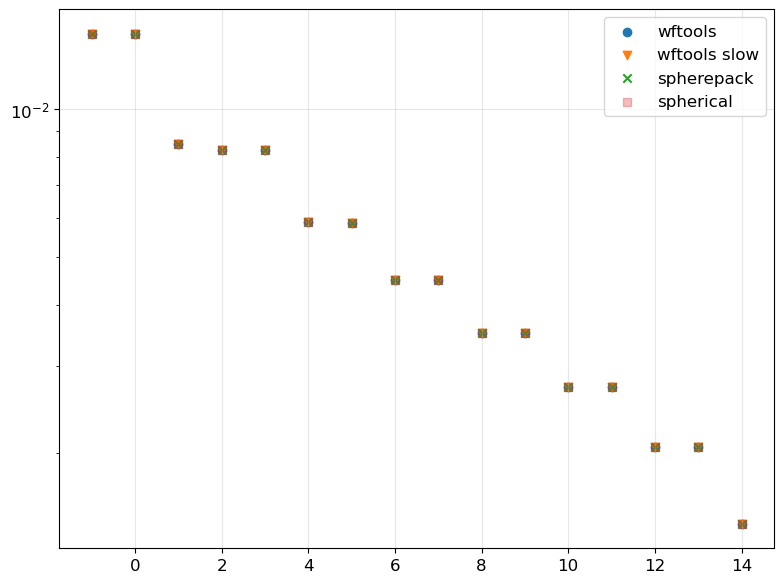

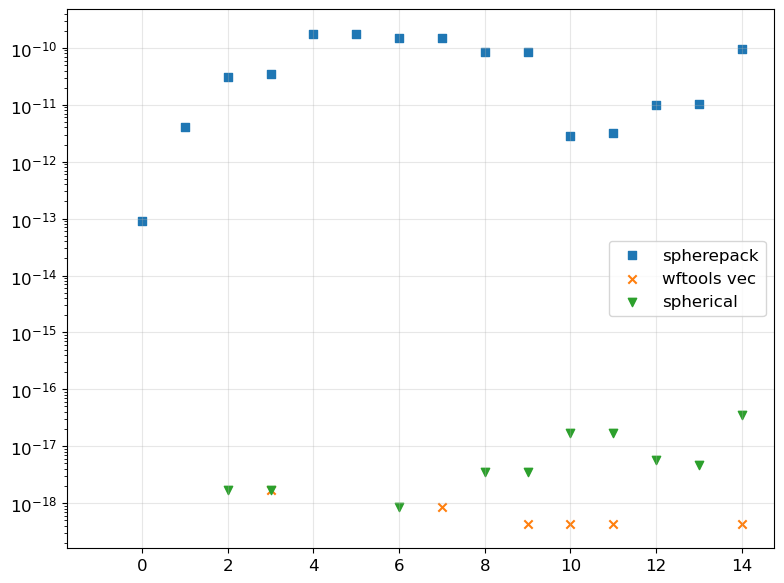

In [37]:
fig, ax = plt.subplots()
ax.set_yscale('log')

ax.scatter(wfmodes.residual_axis, wfmodes.residuals, label='wftools')
ax.scatter(wfmodes_slow.residual_axis, wfmodes_slow.residuals, label='wftools slow', marker='v')
ax.scatter(spmodes.residual_axis, spmodes.residuals, label='spherepack', marker='x')
ax.scatter(modes_spherical.residual_axis, modes_spherical.residuals, label='spherical', marker='s', alpha=0.3)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(wfmodes.residual_axis, abs(np.array(wfmodes.residuals) - np.array(spmodes.residuals)), label='spherepack', marker='s')
ax.scatter(wfmodes.residual_axis, abs(np.array(wfmodes.residuals) - np.array(wfmodes_slow.residuals)), label='wftools vec', marker='x')
ax.scatter(wfmodes.residual_axis, abs(np.array(wfmodes.residuals) - np.array(modes_spherical.residuals)), label='spherical', marker='v')
#plt.scatter(spmodes.residual_axis, spmodes.residuals, label='spherepack', marker='x')
plt.legend()
plt.show()

In [44]:
ell = 3
emm = 1
wfmodes.mode(ell, emm), wfmodes_slow.mode(ell, emm), spmodes.mode(ell, emm), modes_spherical.mode(ell, emm)

((0.0005222917541377897+0.00013465139243512954j),
 (0.0005222917541377865+0.00013465139243512962j),
 (0.0005222922227322968+0.00013465161022411547j),
 (0.0005222917541377874+0.00013465139243513198j))

In [25]:
np.testing.assert_array_almost_equal(wfmodes._modes_data, spmodes._modes_data, 1, "MA")

In [28]:
for ell in range(ell_max+1):
    for emm in range(-ell, ell+1):

        np.testing.assert_almost_equal(wfmodes.mode(ell, emm), spmodes.mode(ell, emm), 8, f"l{ell} m {emm}")

AssertionError: 
Arrays are not almost equal to 8 decimals l1 m -1
 ACTUAL: (-0.03064711432213326-0.010458835080748116j)
 DESIRED: (0.030647116888504484+0.010458835833054162j)

In [78]:
spmodes.mode(8, 0)

(-1.8220521293885986e-06+0j)

((3.825639992497958e-06+0.012425985740451635j),
 (3.825639992498356e-06-0.012425985740451636j),
 (3.825555325409369e-06-0.012425988484043964j))

In [ ]:
3.5449077018110318/2.5066284430248484

1.4142134673670463

In [ ]:
np.sqrt(2)

1.4142135623730951

In [ ]:
aaa = np.array([-2, -1, 0, 1, 2])

In [ ]:
aaa[aaa>0]

array([1, 2])

In [18]:
wfmodes.evaluate_old(theta=np.pi/2 , phi=0, ell_max=wfmodes.ell_max)

(1.0000000000000527175+1.625003390576730251e-34j)

In [19]:
%%timeit
wfmodes.evaluate_old(theta=np.pi/2 , phi=0, ell_max=wfmodes.ell_max)

5.68 s ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
wfmodes.evaluate(theta=np.pi/2 , phi=0, ell_max=wfmodes.ell_max)

array(1.+9.61424228e-31j)

In [12]:
wfmodes.evaluate(theta=theta_grid , phi=phi_grid, ell_max=wfmodes.ell_max).shape

(15, 30)

In [16]:
%%timeit
wfmodes.evaluate(theta=np.pi/2 , phi=0, ell_max=wfmodes.ell_max)

1.07 s ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
m = 2.0

type(m)

float

In [16]:
if int(m)==m:
    print(1)

1


In [10]:
wfmodes.evaluate_sp(theta=np.pi/2 , phi=0, ell_max=wfmodes.ell_max)

(1.0000000000000526+0j)

In [85]:
from importlib import reload
import spectral
reload(spectral.spherical.swsh)

<module 'spectral.spherical.swsh' from '/home/vaishakprasad/Documents/Projects/Codes/custom_libraries/spectral/spectral/spherical/swsh.py'>

In [86]:
from spectral.spherical.swsh import create_Ylm_modes_array

In [87]:
sYlm = create_Ylm_modes_array(theta=np.pi/2, phi=0.0, ell_max=2, spin_weight=-2)

In [88]:
sYlm.mode(2, 2)

(0.15769578262625997-3.862432708645721e-17j)

In [89]:
Yslm(spin_weight=0, theta=np.pi/2, phi=0, ell=2, emm=2)

(0.3862742020231896+0j)

In [37]:
from importlib import reload
import spectral
reload(spectral.spherical.Yslm_mp)

<module 'spectral.spherical.Yslm_mp' from '/home/vaishakprasad/Documents/Projects/Codes/custom_libraries/spectral/spectral/spherical/Yslm_mp.py'>

In [11]:
from spectral.spherical.Yslm_mp import Yslm_mp

In [12]:
theta_grid

array([[0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311],
       [0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183],
       [0.55820621, 0.55820621, 0.55820621, 0.55820621, 0.55820621,
        0.55820621, 0.55820621, 0.55820621, 0.55820621, 0.55820621,
        0.55820621, 0.55820621, 0.55820621, 0.

In [13]:
cYslm = Yslm_mp(ell_max=14, spin_weight=0, grid_info=gl_info)

In [14]:
cYslm.run()

In [15]:
cYslm.sYlm_modes.mode(2, 2)

array([[ 0.00922067+0.00000000e+00j,  0.0084235 +3.75038362e-03j,
         0.00616983+6.85229184e-03j,  0.00284934+8.76937655e-03j,
        -0.00096382+9.17015639e-03j, -0.00461033+7.98533288e-03j,
        -0.00745968+5.41977277e-03j, -0.00901917+1.91708471e-03j,
        -0.00901917-1.91708471e-03j, -0.00745968-5.41977277e-03j,
        -0.00461033-7.98533288e-03j, -0.00096382-9.17015639e-03j,
         0.00284934-8.76937655e-03j,  0.00616983-6.85229184e-03j,
         0.0084235 -3.75038362e-03j,  0.00922067-2.25841235e-18j,
         0.0084235 +3.75038362e-03j,  0.00616983+6.85229184e-03j,
         0.00284934+8.76937655e-03j, -0.00096382+9.17015639e-03j,
        -0.00461033+7.98533288e-03j, -0.00745968+5.41977277e-03j,
        -0.00901917+1.91708471e-03j, -0.00901917-1.91708471e-03j,
        -0.00745968-5.41977277e-03j, -0.00461033-7.98533288e-03j,
        -0.00096382-9.17015639e-03j,  0.00284934-8.76937655e-03j,
         0.00616983-6.85229184e-03j,  0.0084235 -3.75038362e-03j],
       [ 

In [16]:
%%timeit
cYslm.run()

643 ns ± 8.25 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [34]:
%%timeit
cYslm.run()

1.48 s ± 31.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
np.array(cYslm.sYlm_modes._modes_data).shape

(225, 15, 30)

In [14]:
%%timeit
cYslm.store_as_modes()

3.84 s ± 73.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
cYslm.result_list

[[0, array(0.28209479+0.j)],
 [1, array(0.34549415+0.j)],
 [2, array(5.42457759e-17+0.j)],
 [3, array(-0.34549415+0.j)],
 [4, array(0.3862742+0.j)],
 [5, array(1.71540205e-16+0.j)],
 [6, array(-0.31539157+0.j)],
 [7, array(-1.71540205e-16+0.j)],
 [8, array(0.3862742+0.j)]]

In [47]:
wfmodes.mode(1,0)

(2.1236804377400126e-16+0j)

In [50]:
int(np.sqrt(5)-1)

1

In [52]:
int(1.99)

1

In [54]:
int(np.sqrt(5))

2

In [51]:
5- (4)

1

In [55]:
1 - 2

-1

In [21]:
%%timeit
def get_index(ell, emm):
    ind = 0
    for ell_ind in range(ell + 1):
        ind += 2 * ell_ind + 1

    return ind + emm - ell_ind - 1

#info = GLGrid(L=24)
# minfo = method_info(ell_max=24, int_method='GL')

ell_max = 24

#from waveformtools.transforms import Yslm_prec_grid

#theta_grid, phi_grid = info.meshgrid

theta = np.pi/2
phi = 0
spin_weight = 0

import quaternionic, spherical

R = quaternionic.array.from_spherical_coordinates(theta, phi)
# ell_max = ell

wigner = spherical.Wigner(ell_max)

Y2 = wigner.sYlm(spin_weight, R)


Ylm_spherical = Y2.T[get_index(2, 0)].T

313 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
Y2.shape

(625,)

In [1]:
import numpy as np

In [3]:
aa = np.zeros((10, *(2, 2)))

In [4]:
aa.shape

(10, 2, 2)

In [54]:
from qlmtools.integration import TwoDIntegral

In [55]:
func = np.sin(theta_grid)

In [56]:
cYslm

NameError: name 'sYlm' is not defined

In [60]:
Ym = np.array(cYslm.sYlm_modes._modes_data)

In [62]:
Ym.shape

(225, 15, 30)

In [63]:
integrand = Ym*func

In [70]:
integrand.shape

(225, 15, 30)

In [67]:
modes_vec = TwoDIntegral(integrand, gl_info, method='GL')

In [69]:
modes_vec.shape

()

In [74]:
np.tensordot(integrand, gl_info.weights_grid, axes=((-2, -1), (0,1))).shape

(225,)

In [15]:
class trial:

    def __init__(self, a):
        self.a = a

    b = 0

In [22]:
tt = trial(1)
tt2 = trial(2)

In [23]:
tt.a

1

In [24]:
tt.b

0

In [19]:
tt.b = 3

In [1]:
import numpy as np
import numba as nb

In [6]:
nb.typeof([2.0, 3.4])

List(float64, True)

In [9]:
nb.typeof([[2, [1, 2, 3], [0, [1, 2]]]])

List(reflected list(int64)<iv=None>, True)

In [10]:
nb.typeof({'l0': {'m1' : 4.2}})

ValueError: Cannot determine Numba type of <class 'dict'>